1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy import stats

solution with x0=[0.5,0.5]:  [-0.08984202  0.7126564 ] 

solution with x0=[0,0]:  [0. 0.] 



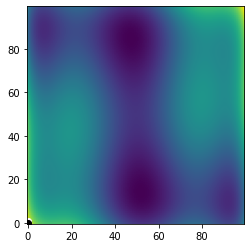

In [44]:
def f (x):
    return (4 - 2.1 * x[0]**2 + (x[0]**4 / 3))* x[0]**2 + x[0]*x[1] + (4* x[1]**2 - 4)* x[1]**2
x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)
res = f([X,Y])
plt.figure()
plt.imshow(res,origin="lower")
# Find the global minima of this function
solution = optimize.minimize(f, x0=[0.5,0.5])
print("solution with x0=[0.5,0.5]: ",solution['x'],"\n")
plt.scatter(solution.x[0], solution.x[1], color='white')


# What happens for an initial guess of (𝑥,𝑦)=(0,0)
solution1 = optimize.minimize(f, x0=[0, 0])
print("solution with x0=[0,0]: ",solution1['x'],"\n")
plt.scatter(solution1.x[0], solution1.x[1], color='black')
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

the fit function: 20.371184 * sin( 3.104248 * x) + 15
the fit function: 25.434447 * sin( 2.169717 * (x - 0.704301)) - 35


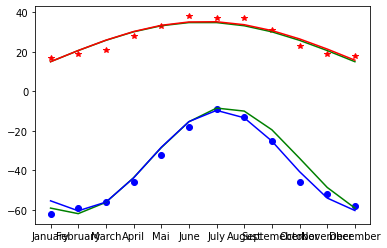

In [102]:
x= ['January', 'February', 'March', 'April', 'Mai', 'June', 'July', 'August', 'Septemeber', 'October', 'November', 'December']
x_max= [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
x_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

plt.figure()

#Plot these temperatures.
plt.plot(x,x_max , 'r*')
plt.plot(x,x_min, 'bo')

#Find a suitable a function that can describe min and max temperatures
y = np.linspace(0,1,12)
y_max = 20* np.sin(np.pi * y) + 15
plt.plot(x,y_max, 'g')

y_min = 27* np.sin(np.pi * (2*y -0.65)) - 35
plt.plot(x,y_min, 'g')

#Fit this function to the data with scipy.optimize.curve_fit()
def f_max (x, A, nu):
    return (A * np.sin(nu * x) + 15)
popt, pcov = optimize.curve_fit(f_max, y, x_max, p0=[2, 2], full_output=False)
print('the fit function: %f * sin( %f * x) + 15'% (popt[0],popt[1]) )
plt.plot(x,f_max(y,popt[0],popt[1]), 'r')

def f_min (x, A, nu,l):
    return (A * np.sin(np.pi * (nu * x - l)) - 35)
popt_min, pcov_min = optimize.curve_fit(f_min, y, x_min, p0=[2, 2,0.5], full_output=False)
print('the fit function: %f * sin( %f * (x - %f)) - 35'% (popt_min[0],popt_min[1],popt_min[2]) )
plt.plot(x,f_min(y,popt_min[0],popt_min[1],popt_min[2]), 'b')

#Plot the result. Is the fit reasonable? -> yes, it fits
plt.show()

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

p-value = 0.0


<ipython-input-217-31a98b2ce2cc>:22: RuntimeWarning: overflow encountered in exp
  return A * np.exp(freq * x ) + 1


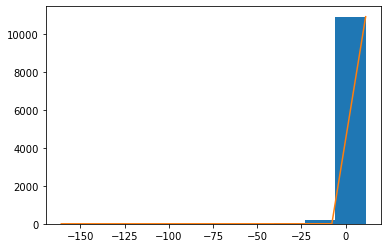

In [217]:
#Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
data=np.load('data/residuals_261.pkl',allow_pickle=True)
df=pd.DataFrame(data.item())
plt.figure()
_, _, patches = plt.hist(df['residuals'], bins=10)

#Set the appropriate Poisson uncertainty for each bin
#(thus, for each bin,  𝜎𝑖=𝑛𝑖⎯⎯⎯√ , where  𝑛𝑖  is the number of entries in each bin)
sigma=[]
border=[]
value=[]
for pp in patches:
    value.append(pp._y1)
    sigma.append( np.sqrt(pp._y1) )    
    if not(pp._x0 in border):
        border.append(pp._x0)
    border.append(pp._x1)

#By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
x= np.linspace(border[0],border[-1],10)
def f(x,A,freq):
    return A * np.exp(freq * x ) + 1
popt, pcov = optimize.curve_fit(f, x, value, p0=[0.025,0.7], full_output=False)
plt.plot(x,f(x,popt[0],popt[1]))

#Perform a goodness-of-fit test. Is the p-value of the fit satisfactory? -> no because p-value < 0.5
chi2 = np.sum(((value - f(x,popt[0],popt[1]))**2) / sigma)
pvalue = 1. - stats.chi2.cdf(chi2, 9)
print("p-value =", pvalue)



plt.show()


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

the best-fit values are: 10.018001 cos(2 * pi * t + 2.900714) + 9.351029
the overall average temperature: 9.351029 
the typical daily average values for the coldest and hottest time of year: 19.369030 and -0.666971
the best-fit values for g(x) model are: 10.019992 cos(2 * pi * 0.999570 * t + 8.334625) + 9.346839
RSS of f(x) is :40376.572228 
RSS of g(x) is : 40375.279977
CL: 0.809 , additional parameter necessary: NO


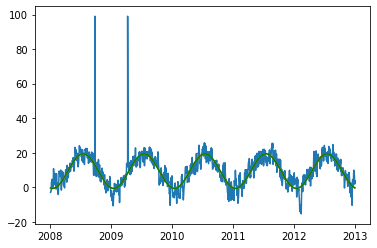

In [49]:
file_name= "data/munich_temperatures_average_with_bad_data.txt"
data = pd.read_csv(file_name, delimiter=' ')

#Make a plot of the data and the best-fit model in the range 2008 to 2012.
df = data[data['year'] >= 2008]
df = df[df['year'] < 2013]
plt.figure()
plt.plot(df['year'], df['temperature'])

#What are the best-fit values of the parameters?
def f(x,a,b, c):
    return a * np.cos(2 * np.pi * x + b) + c
popt, pcov = optimize.curve_fit(f, df['year'], df['temperature'], p0=[2, 2, 9], full_output=False)
plt.plot(df['year'],f(df['year'],popt[0],popt[1],popt[2]))
print('the best-fit values are: %f cos(2 * pi * t + %f) + %f'%(popt[0],popt[1], popt[2]))

#What is the overall average temperature in Munich, and what are the typical daily average 
#values predicted by the model for the coldest and hottest time of year?
print('the overall average temperature: %f \nthe typical daily average values for the coldest and hottest time of year: %f and %f'%(popt[2],popt[0]+popt[2],popt[2]-popt[0]))

#What is the meaning of the  𝑏  parameter, and what physical sense does it have?
#mathematically the b parameter is to shift the cosinus function to the right or to the left to fit the model

#Now fit the data with the function  𝑔(𝑥) 
def g(x,a,b,c,d):
    return a * np.cos(2 * np.pi * b * x + c) + d
gopt, gcov = optimize.curve_fit(g, df['year'], df['temperature'], p0=[10, 1, 2,9], full_output=False)
plt.plot(df['year'],g(df['year'],gopt[0],gopt[1],gopt[2],gopt[3]), 'g')
print('the best-fit values for g(x) model are: %f cos(2 * pi * %f * t + %f) + %f'%(gopt[0],gopt[1], gopt[2],gopt[3]))

#What are the RSS for  𝑓(𝑥)  and  𝑔(𝑥) ?
ssr_f = np.sum((df['temperature'] - f(df['year'],popt[0],popt[1],popt[2]))**2)
ssr_g = np.sum((df['temperature'] - g(df['year'],gopt[0],gopt[1],gopt[2],gopt[3]))**2)
print('RSS of f(x) is :%f \nRSS of g(x) is : %f' %(ssr_f,ssr_g))

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL
cl_f_vs_g = Ftest(ssr_f, ssr_g, 2, 3, len(df['year']), verbose=True)


plt.show()